> Copyright 2025 Giovanni Squillero <<giovanni.squillero@polito.it>>  
> SPDX-License-Identifier: `0BSD`

In [68]:
from random import choice, randint, random
import seaborn as sns
from icecream import ic

In [64]:
# Soluzione: array di PROBLEM_SIZE elementi
# Goal: array di tutti True

PROBLEM_SIZE = 256


def fitness(solution):
    return sum(solution)

In [65]:
initial_solution = [choice([True, False]) for _ in range(PROBLEM_SIZE)]

## Random

In [ ]:
tries = 0
best_solution = initial_solution[:]
while fitness(best_solution) < PROBLEM_SIZE:
    tries += 1
    solution = [choice([True, False]) for _ in range(PROBLEM_SIZE)]
    if fitness(solution) > fitness(best_solution):
        best_solution = solution[:]
        print(f"{tries:,}: {fitness(best_solution)}")

## Local search (hill-climbing)

In [ ]:
def tweak(sol):
    new_sol = sol[:]
    i = randint(0, PROBLEM_SIZE - 1)
    new_sol[i] = not new_sol[i]
    return new_sol


tries = 0
best_solution = initial_solution[:]
while fitness(best_solution) < PROBLEM_SIZE:
    tries += 1
    solution = tweak(best_solution)
    if fitness(solution) > fitness(best_solution):
        best_solution = solution[:]
        print(f"{tries:,}: {fitness(best_solution)}")

## Local search (hill-climbing)

$n_m = \frac{1}{1-p}$

<Axes: >

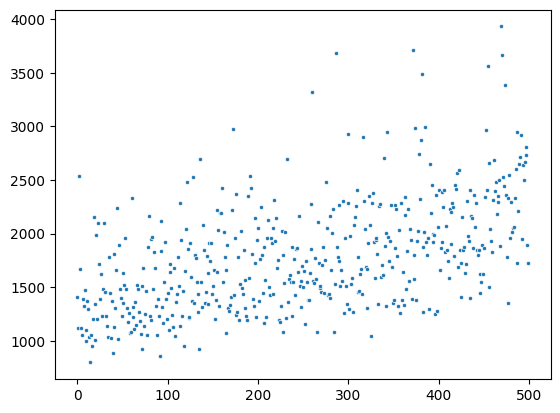

In [82]:
## Local search (hill-climbing)
def tweak(sol, p):
    new_sol = sol[:]
    i = randint(0, PROBLEM_SIZE - 1)
    new_sol[i] = not new_sol[i]
    while random() < p:
        i = randint(0, PROBLEM_SIZE - 1)
        new_sol[i] = not new_sol[i]
    return new_sol


data = (list(), list())
for mutation_strength in range(500):
    for _ in range(10):
        tries = 0
        best_solution = initial_solution[:]
        while fitness(best_solution) < PROBLEM_SIZE:
            tries += 1
            solution = tweak(best_solution, mutation_strength / 1000)
            if fitness(solution) > fitness(best_solution):
                best_solution = solution[:]
    # print(f"Mutation strength: {mutation_strength/1000:g}; best solution found in {tries:,} tries")
    data[0].append(mutation_strength)
    data[1].append(tries)
sns.scatterplot(x=data[0], y=data[1], marker='.')